# **Neural Network**

**Neural network** is a computational model inspired by the structure and function of the human brain's neural networks. 

These networks are used for a wide range of tasks, including pattern recognition, classification, regression, and more, making them one of the foundational building blocks of modern artificial intelligence.

## **Context**

### **Instructions**



The following steps are required to complete the assignment:

- Compute the gradient of the sigmoid function
- Randomly initialize weights
- Compute Neural network cost function


### **Dataset**



For this assignment, we will use the **Breast Cancer Dataset**.

The link to it can be found [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

**The targets** represent the diagnosis of the tumor. It is a binary variable, which can be:
- `Benign`: This column indicates that the tumor is not cancerous.
- `Malignant`: This column indicates that the tumor is cancerous.

**The features** are characteristics or measurements derived from breast cancer biopsies. They are:
- `Radius`: Mean radius of the tumor.
- `Texture`: Mean texture (standard deviation of gray-scale values) of the tumor.
- `Perimeter`: Mean perimeter of the tumor.
- `Area`: Mean area of the tumor.
- `Smoothness`: Mean smoothness (local variation in radius lengths) of the tumor.
- `Compactness`: Mean compactness (perimeter^2 / area - 1.0).
- `Concavity`: Mean concavity (severity of concave portions of the contour).
- `Concave Points`: Mean number of concave portions of the contour.
- `Symmetry`: Mean symmetry.
- `Fractal Dimension`: Mean fractal dimension (coastline approximation - 1). 


## **Model Setup**

### **Environment**


Before we can get into analysis, we need to set up the environment with all the libraries and functions that we will need.

#### Import Libraries

In [1]:
# Imported Libraries
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from random import seed, random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#### Function Definitions

In [2]:
# Initializes the neural network
def initializeNetwork(input, output, hidden):
    network = list()
    
    hiddenLayer = [{'weights': [random() for i in range(input + 1)]} for i in range(hidden)]
    network.append(hiddenLayer)
   
    outputLayer = [{'weights': [random() for i in range(hidden + 1)]} for i in range(output)]
    network.append(outputLayer)
    
    return network

# Sigmoid function
def sigmoid_activation(z):
    return 1.0 / (1.0 + exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(output):
    return output * (1.0 - output)

# Calculates the output of a neuron given the weights and inputs
def calc_neuron_output(weights, inputs):
    z = weights[-1]
    for i in range(len(weights)-1):
        z += weights[i] * inputs[i]
    return z

#  Computes the output of each neuron in each layer for a given input sample.
def forward_propagate(network, sample):
    inputs = sample
    for layer in network:
        new_input = []
        for neuron in layer:
            z = calc_neuron_output(neuron['weights'], inputs)
            neuron['output'] = sigmoid_activation(z)
            new_input.append(neuron['output'])
        inputs = new_input
    return inputs

# Iterates through the layers of the network in reverse order, and calculates the error for each neuron.
def backward_propagate_error(network, y):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error = error+ neuron['weights'][j] * neuron['delta']
                    errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                error = y[j] - neuron['output']
                errors.append(error)
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j]* sigmoid_derivative(neuron['output']) 

# Updates the weights of the neurons in the network based on the calculated delta values during backward propagation
def update_weights(network, sample, alpha):
    for i in range(len(network)):
        inputs = sample[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] = neuron['weights'][j] + alpha * neuron['delta'] * inputs[j]
            neuron['weights'][-1] = neuron['weights'][-1] + alpha * neuron['delta']

# Trains the neural network using backpropagation and stochastic gradient descent
def train_neural_network(network, training_data, learning_rate, num_epochs, num_output_neurons):
    costs = []

    for epoch in range(num_epochs):
        total_error = 0

        for sample in training_data:
            inputs = sample[:-1]

            expected_outputs = [0 for _ in range(num_output_neurons)]
            expected_outputs[int(sample[-1])] = 1

            outputs = forward_propagate(network, inputs)

            error = sum([(expected_outputs[i] - outputs[i]) ** 2 for i in range(len(outputs))]) / 2
            total_error += error

            backward_propagate_error(network, expected_outputs)
            update_weights(network, inputs, learning_rate)

        average_error = total_error / len(training_data)
        costs.append(average_error)

        print(f'Epoch {epoch + 1}/{num_epochs}, Learning Rate: {learning_rate}, Cost: {average_error:.2f}')

    plt.plot(range(num_epochs), costs)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost over Training Epochs')
    plt.show()

# Makes a prediction
def predict(network, sample):
    outputs = forward_propagate(network, sample)
    return outputs.index(max(outputs))

# Evaluates the performance of the neural network on the test data
def printMetrics(precision, recall, f1, classBool):
    
    if classBool:
        print("\nClass 0 (Benign) Metrics:")
    else:
        print("\nClass 1 (Malignant) Metrics:")

    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))


### **Dataset Preparation**

Before we start using the dataset, we must first prepare it.

#### Column Preparation

In [3]:
# Loads the dataset from sklearn
data = load_breast_cancer()

# Splits the features and target labels
X = data.data
y = data.target

# Normalizes the data
X = (X- X.min())/ (X.max() - X.min())

#### Data Splitting

In [4]:
# Splits the data into training and testing sets
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.15, random_state=1, shuffle=True)
trainData = np.c_[Xtrain, yTrain]
testData = np.c_[Xtest, yTest]

# Setting the seed for reproducibility
seed(2020230164)

# Combining the data
trainData = np.c_[Xtrain,yTrain]
testData = np.c_[Xtest,yTest]

## **Implementation**

### **Initializing and Training a Neural Network**

Epoch 1/500, Learning Rate: 0.25, Cost: 0.24
Epoch 2/500, Learning Rate: 0.25, Cost: 0.24
Epoch 3/500, Learning Rate: 0.25, Cost: 0.24
Epoch 4/500, Learning Rate: 0.25, Cost: 0.24
Epoch 5/500, Learning Rate: 0.25, Cost: 0.24
Epoch 6/500, Learning Rate: 0.25, Cost: 0.23
Epoch 7/500, Learning Rate: 0.25, Cost: 0.23
Epoch 8/500, Learning Rate: 0.25, Cost: 0.23
Epoch 9/500, Learning Rate: 0.25, Cost: 0.22
Epoch 10/500, Learning Rate: 0.25, Cost: 0.22
Epoch 11/500, Learning Rate: 0.25, Cost: 0.21
Epoch 12/500, Learning Rate: 0.25, Cost: 0.20
Epoch 13/500, Learning Rate: 0.25, Cost: 0.19
Epoch 14/500, Learning Rate: 0.25, Cost: 0.17
Epoch 15/500, Learning Rate: 0.25, Cost: 0.16
Epoch 16/500, Learning Rate: 0.25, Cost: 0.14
Epoch 17/500, Learning Rate: 0.25, Cost: 0.13
Epoch 18/500, Learning Rate: 0.25, Cost: 0.12
Epoch 19/500, Learning Rate: 0.25, Cost: 0.12
Epoch 20/500, Learning Rate: 0.25, Cost: 0.11
Epoch 21/500, Learning Rate: 0.25, Cost: 0.11
Epoch 22/500, Learning Rate: 0.25, Cost: 0.

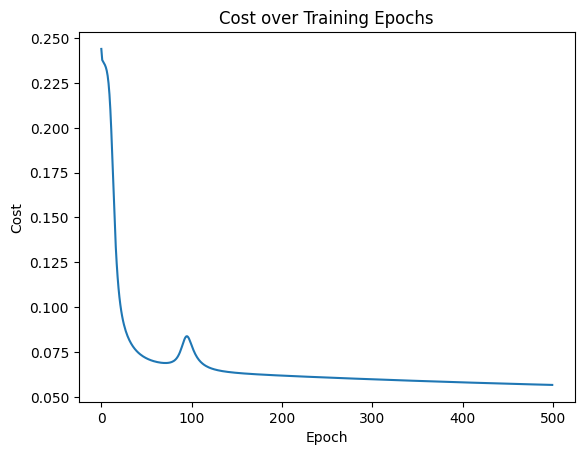

[[{'weights': [0.8902256529512226, -0.33857609986755893, 0.19370698986136886, 2.8810829302498346, 0.9116914563493042, 0.38710026672865755, 0.010817778383283851, 0.5681717186731438, 0.6882289027651931, 0.7962471814204524, 0.3655656056086024, 0.0908986254528858, 0.598216269745178, -0.7216679690220603, 0.0816141816715423, 0.536486069440973, 0.2416829173620296, 0.27625722315778345, 0.3378287564054651, 0.038073240243638014, 0.040611924859165455, -0.751224248791903, -1.139723984644779, -11.908753784179728, 0.590053903877268, 0.46833773708728976, -0.013113806637824849, 0.9706911530370071, 0.492304021911013, 0.1657875824537416, 1.2352053180183038], 'output': 0.5095039774687389, 'delta': 0.0006660382121715674}, {'weights': [0.47853714067396713, -0.8360750452055119, 0.4761434600642039, 6.938315675375135, 0.6949593234231917, 0.8309284366067732, 0.3937892777322929, 0.40067542442492304, 0.018493656942517377, 0.7814080164907771, 0.0013849078488571492, 0.19895588367713743, -0.21220529499001728, -2.15

In [5]:
# Initialize the values
inputNum = len(trainData[0]) - 1
outputNum = len(set([sample[-1] for sample in trainData]))
hiddenNum = len(yTrain) // (5 * (inputNum - outputNum))

# Initialize the Neural Network
neuralNetwork = initializeNetwork(inputNum, outputNum, hiddenNum)
alpha = 0.25
epochs = 500

# Train the network
train_neural_network(neuralNetwork, trainData, alpha, epochs, outputNum)

# Print the network after training
print(neuralNetwork)

### **Evaluating Model Predictions**

In [6]:
# Initialize the predictions and correct predictions
predictions = []
correctPredictions = 0

# Make predictions on the test data
for i in Xtest:
    prediction = predict(neuralNetwork, i)
    predictions.append(prediction)

# Compare the predictions to the actual labels
for j in range(len(yTest)):
    if yTest[j] == predictions[j]:
        correctPredictions += 1

# Confusion Matrix
confusionMatrix = confusion_matrix(yTest, predictions)

# Precision, Recall, and F1 Score [Class 0]
tn, fp, fn, tp = confusionMatrix.ravel()
precision = precision_score(yTest, predictions, pos_label=0)
recall = recall_score(yTest, predictions, pos_label=0)
f1 = f1_score(yTest, predictions, pos_label=0)

# Precision, Recall, and F1 Score [Class 1]
tn1, fp1, fn1, tp1 = confusionMatrix.ravel()
precision1 = precision_score(yTest, predictions, pos_label=1)
recall1 = recall_score(yTest, predictions, pos_label=1)
f11 = f1_score(yTest, predictions, pos_label=1)

# Print the results
print("Correct Predictions:", correctPredictions)
print("Total Predictions:", len(yTest))
print("Accuracy: {:.2f}%".format(correctPredictions / len(yTest) * 100.0))

Correct Predictions: 78
Total Predictions: 86
Accuracy: 90.70%


### **Calculating Metrics**

In [7]:
# Prints Metrics
printMetrics(precision, recall, f1, True)
printMetrics(precision1, recall1, f11, False)


Class 0 (Benign) Metrics:
Precision: 0.96
Recall: 0.79
F1 Score: 0.87

Class 1 (Malignant) Metrics:
Precision: 0.88
Recall: 0.98
F1 Score: 0.93
